In [3]:
import sys
print (sys.version)

3.5.0 (v3.5.0:374f501f4567, Sep 12 2015, 11:00:19) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]


In [4]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [5]:
cd Documents/udemy/Python-Data-Science-and-Machine-Learning-Bootcamp/Data-Capstone-Projects/

[Errno 2] No such file or directory: 'Documents/udemy/Python-Data-Science-and-Machine-Learning-Bootcamp/Data-Capstone-Projects/'
/Users/elizabethmacdonald/Documents/udemy/Python-Data-Science-and-Machine-Learning-Bootcamp/Data-Capstone-Projects


In [6]:
df = pd.read_pickle('all_banks') 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
(BAC, Open)      2517 non-null float64
(BAC, High)      2517 non-null float64
(BAC, Low)       2517 non-null float64
(BAC, Close)     2517 non-null float64
(BAC, Volume)    2517 non-null int64
(C, Open)        2517 non-null float64
(C, High)        2517 non-null float64
(C, Low)         2517 non-null float64
(C, Close)       2517 non-null float64
(C, Volume)      2517 non-null int64
(GS, Open)       2517 non-null float64
(GS, High)       2517 non-null float64
(GS, Low)        2517 non-null float64
(GS, Close)      2517 non-null float64
(GS, Volume)     2517 non-null int64
(JPM, Open)      2517 non-null float64
(JPM, High)      2517 non-null float64
(JPM, Low)       2517 non-null float64
(JPM, Close)     2517 non-null float64
(JPM, Volume)    2517 non-null int64
(MS, Open)       2517 non-null float64
(MS, High)       2517 non-null float64
(MS, Low)        2517 non

In [8]:
tickers = []

In [9]:
for i in list(df.columns.values):
    if i[0] not in tickers:
        tickers.append(i[0])

In [10]:
tickers = sorted(tickers)

In [11]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
(BAC, Open)      2517 non-null float64
(BAC, High)      2517 non-null float64
(BAC, Low)       2517 non-null float64
(BAC, Close)     2517 non-null float64
(BAC, Volume)    2517 non-null int64
(C, Open)        2517 non-null float64
(C, High)        2517 non-null float64
(C, Low)         2517 non-null float64
(C, Close)       2517 non-null float64
(C, Volume)      2517 non-null int64
(GS, Open)       2517 non-null float64
(GS, High)       2517 non-null float64
(GS, Low)        2517 non-null float64
(GS, Close)      2517 non-null float64
(GS, Volume)     2517 non-null int64
(JPM, Open)      2517 non-null float64
(JPM, High)      2517 non-null float64
(JPM, Low)       2517 non-null float64
(JPM, Close)     2517 non-null float64
(JPM, Volume)    2517 non-null int64
(MS, Open)       2517 non-null float64
(MS, High)       2517 non-null float64
(MS, Low)        2517 non

In [13]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [14]:
df.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [15]:
returns = pd.DataFrame()

In [16]:
#df.xs(key = 'Close', axis = 1, level = 'Stock Info')

#for i in df.xs(key = 'Close', axis = 1, level = 'Stock Info').pct_change():
 #   x = i + ' Return'
  #  returns = x
#returns = df.xs(key = 'Close', axis = 1, level = 'Stock Info').pct_change()

for tick in tickers:
    returns[tick + ' Return'] = df[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


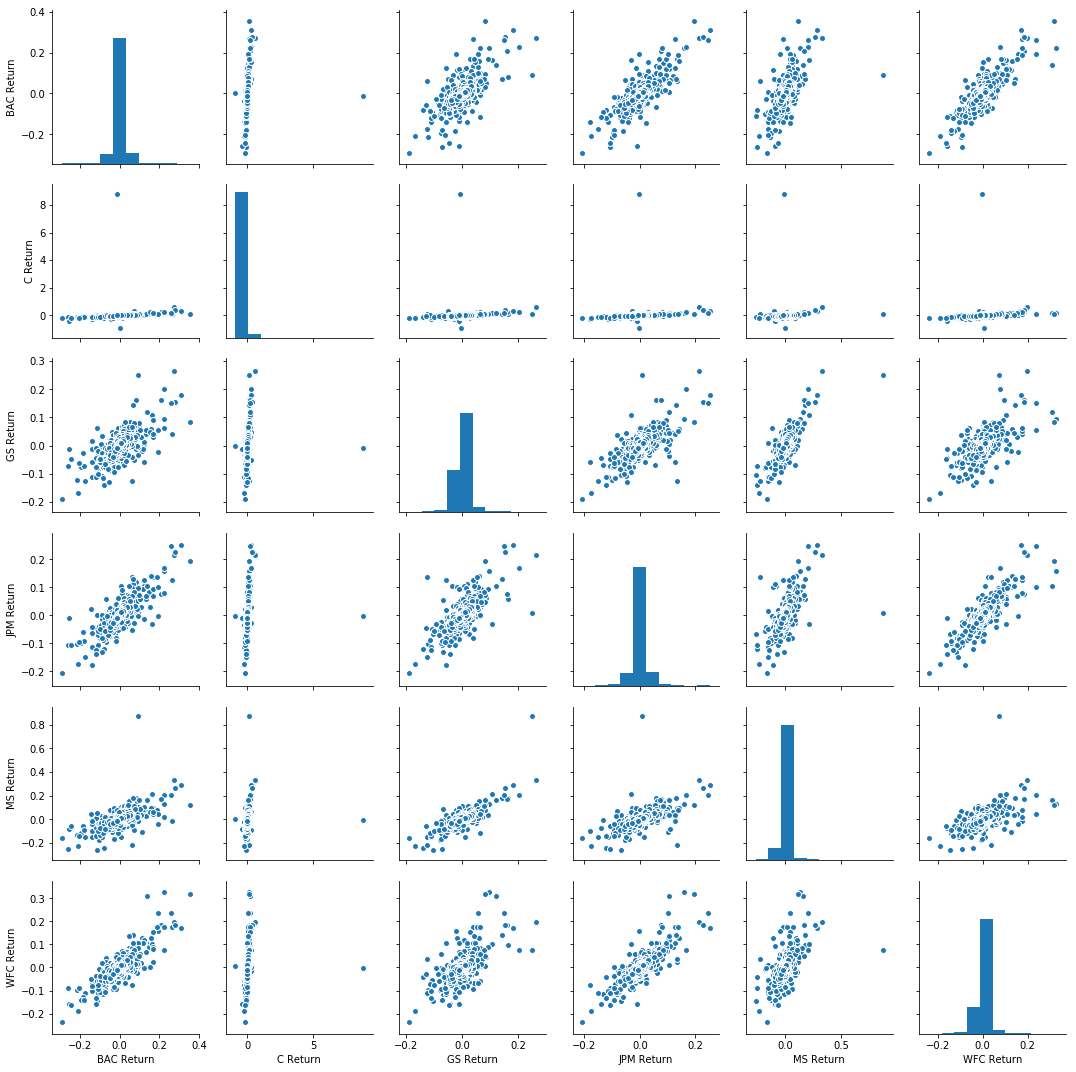

In [17]:
returns = returns.drop(returns.index[0])
sns.pairplot(returns, dropna = True)

In [18]:
#returns = returns.reset_index()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000947


In [19]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [20]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [21]:
returns.ix['2015-01-01':'2015-12-31'].std()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

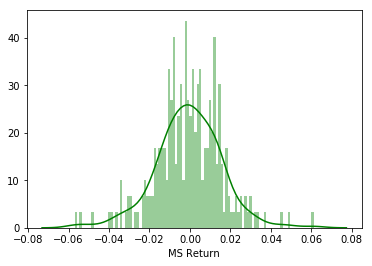

In [22]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'], bins = 100, color = 'green')

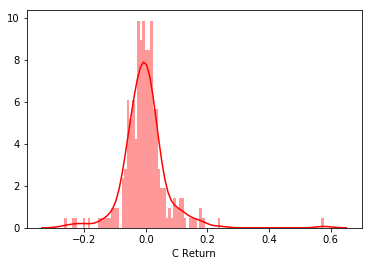

In [23]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'], bins = 100, color = 'red')

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


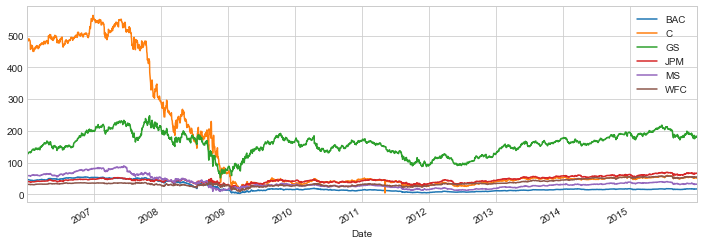

In [25]:
for tick in tickers:
    df[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

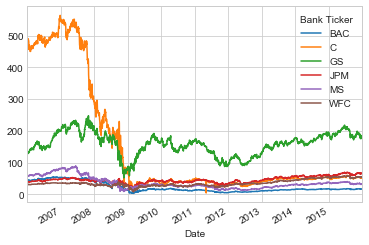

In [44]:
## different way of making hte same plot
df.xs(key = 'Close', axis = 1, level = 'Stock Info').plot()

In [45]:
df.xs(key = 'Close', axis = 1, level = 'Stock Info').iplot()

In [27]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [28]:
df['BAC MEAN'] = pd.rolling_mean(df['2008-01-01':'2008-12-31']['BAC']['Close'], window = 30)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()



NameError: name 'BAC' is not defined

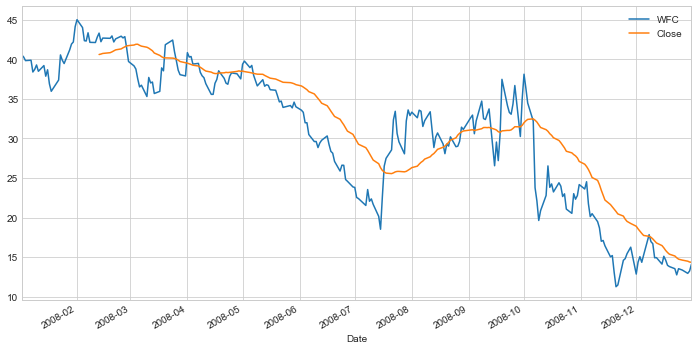

In [29]:
#df['BAC MEAN'] = pd.rolling_mean(df['2008-01-01':'2008-12-31']['BAC']['Close'], window = 30)
df['BAC']['Close']['2008-01-01':'2008-12-31'].plot(figsize=(12,6),label=tick)
pd.rolling_mean(df['2008-01-01':'2008-12-31']['BAC']['Close'], window = 30).plot()
plt.legend()


### solutions answer, above answer also works (solution answer works because he started with a data frame named BAC)

#plt.figure(figsize=(12,6))
#BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
#BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
#plt.legend()

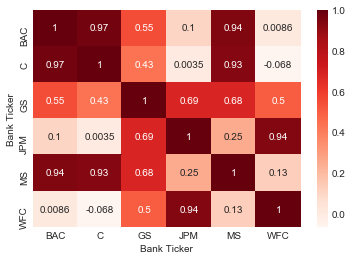

In [33]:
sns.heatmap(df.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True, cmap = 'Reds')

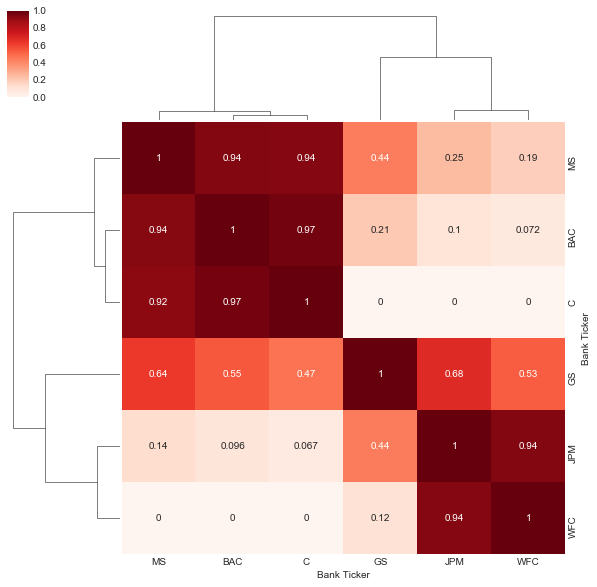

In [37]:
sns.clustermap(df.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), cmap = 'Reds', standard_scale = 1, annot = True)

In [46]:
close_cor = df.xs(key = 'Close', axis = 1, level = 'Stock Info').corr()

In [48]:
close_cor.iplot(kind = 'heatmap')